# Kaggle House Prediction 

In [275]:
import pandas as pd
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [276]:
df3=pd.concat([df1,df2])
intcol=df3.select_dtypes(include=['int64','float64'])
catcol=df3.select_dtypes(include=object)

## Transformation

In [277]:
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

skew=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF']
for col in skew:
    df3[col]=df3[col]**.5
col=intcol.columns
col1=catcol.columns

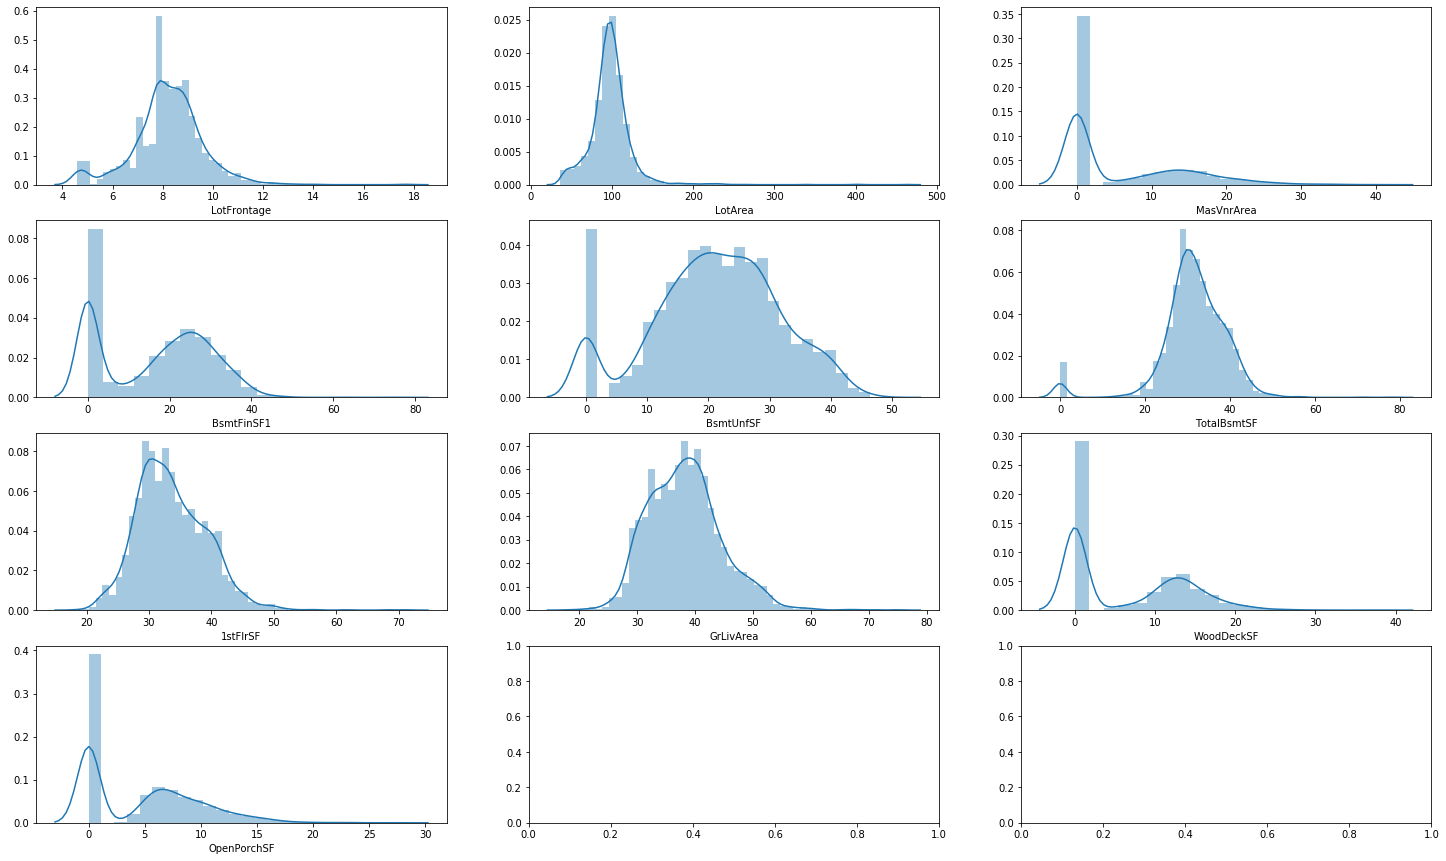

In [278]:
fig, ax = plt.subplots(nrows=4,ncols=3,figsize=(25,15))
sns.distplot(df3[skew[0]],ax=ax[0][0])
sns.distplot(df3[skew[1]],ax=ax[0][1])
sns.distplot(df3[skew[2]],ax=ax[0][2])
sns.distplot(df3[skew[3]],ax=ax[1][0])
sns.distplot(df3[skew[4]],ax=ax[1][1])
sns.distplot(df3[skew[5]],ax=ax[1][2])
sns.distplot(df3[skew[6]],ax=ax[2][0])
sns.distplot(df3[skew[7]],ax=ax[2][1])
sns.distplot(df3[skew[8]],ax=ax[2][2])
sns.distplot(df3[skew[9]],ax=ax[3][0])

1. Even though Sqrt transformed still many outliers visible. Later will cap those outliers.
2. YearBuilt is tough to transform.

## Removal of outliers

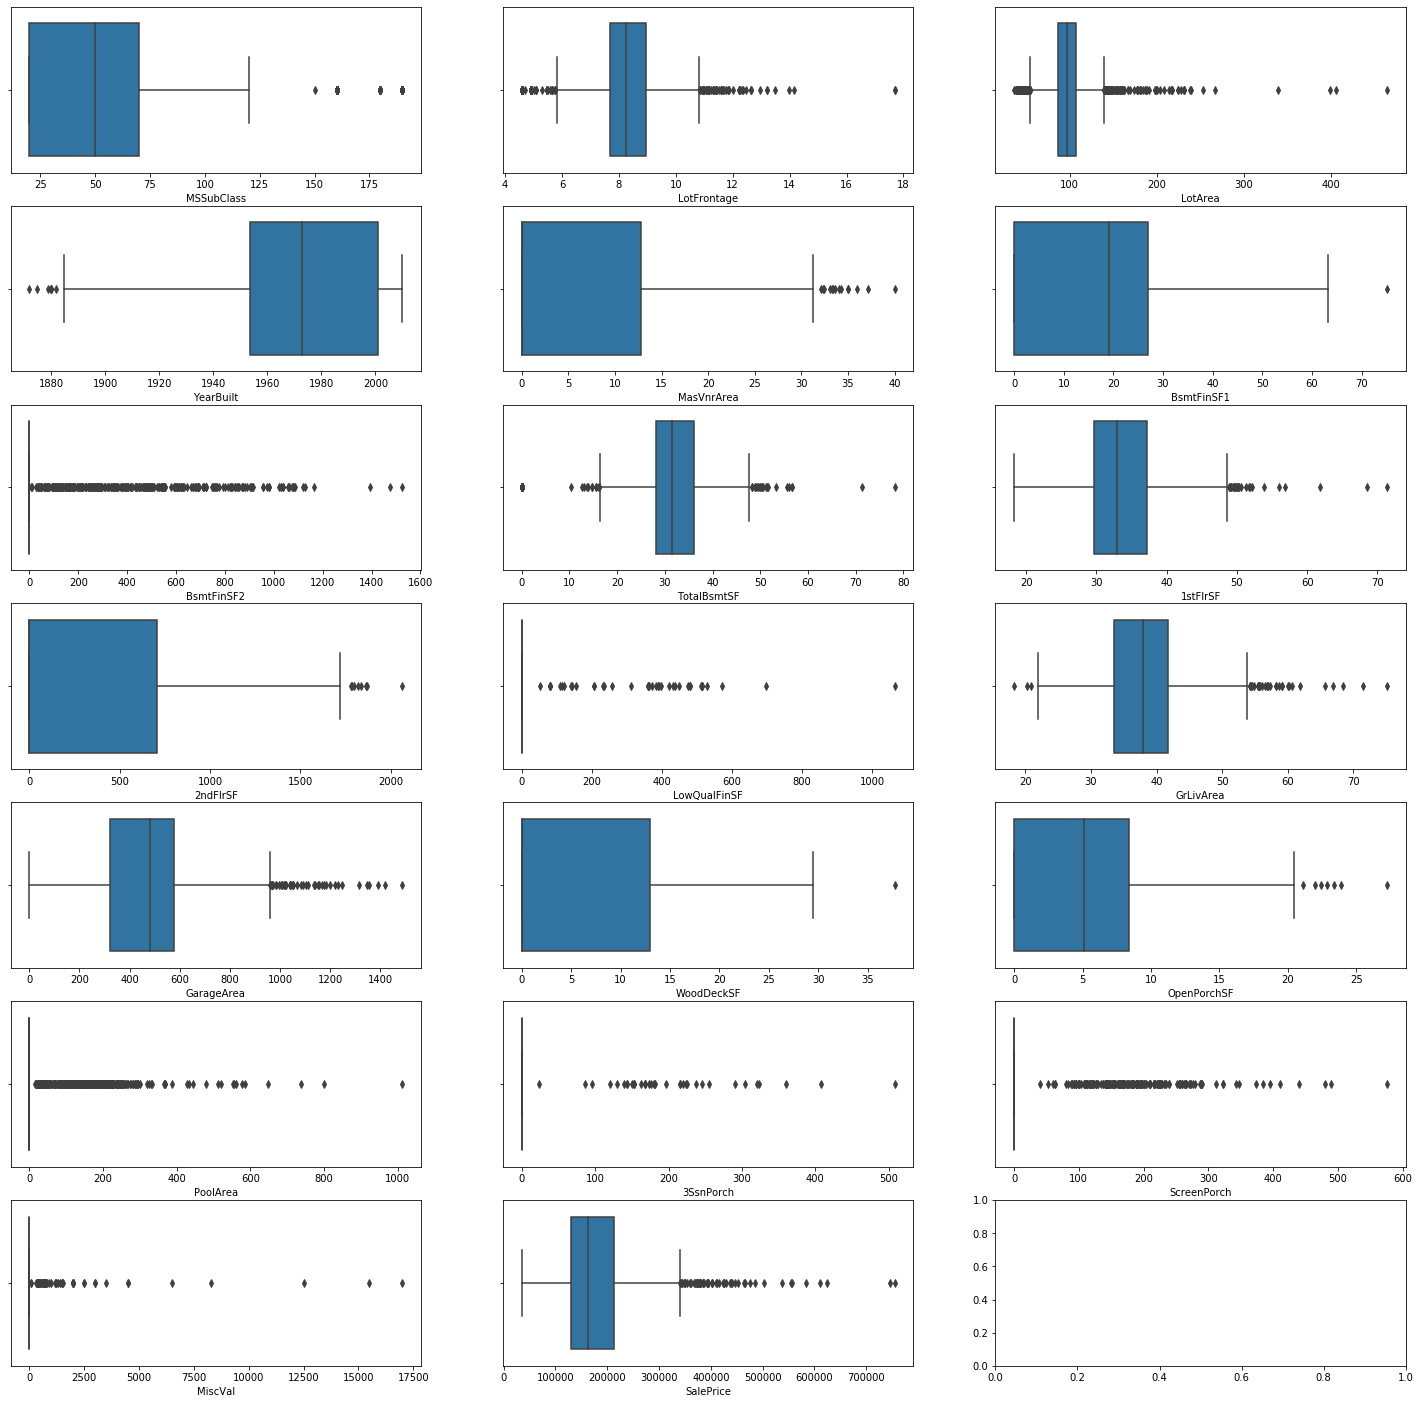

In [279]:
fig, ax = plt.subplots(nrows=7,ncols=3,figsize=(25,25))
sns.boxplot(df3[col[1]],ax=ax[0][0])
sns.boxplot(df3[col[2]],ax=ax[0][1])
sns.boxplot(df3[col[3]],ax=ax[0][2])
sns.boxplot(df3[col[6]],ax=ax[1][0])
sns.boxplot(df3[col[8]],ax=ax[1][1])
sns.boxplot(df3[col[9]],ax=ax[1][2])
sns.boxplot(df3[col[10]],ax=ax[2][0])
sns.boxplot(df3[col[12]],ax=ax[2][1])
sns.boxplot(df3[col[13]],ax=ax[2][2])
sns.boxplot(df3[col[14]],ax=ax[3][0])
sns.boxplot(df3[col[15]],ax=ax[3][1])
sns.boxplot(df3[col[16]],ax=ax[3][2])
sns.boxplot(df3[col[27]],ax=ax[4][0])
sns.boxplot(df3[col[28]],ax=ax[4][1])
sns.boxplot(df3[col[29]],ax=ax[4][2])
sns.boxplot(df3[col[30]],ax=ax[5][0])
sns.boxplot(df3[col[31]],ax=ax[5][1])
sns.boxplot(df3[col[32]],ax=ax[5][2])
sns.boxplot(df3[col[33]],ax=ax[5][0])
sns.boxplot(df3[col[34]],ax=ax[6][0])
sns.boxplot(df3[col[37]],ax=ax[6][1])

1. MSSubClass is a kind of integer categorical variable so not going to cap it.
2. Also as SalePrice is the target we are not going to modify it.

In [280]:
#Will cap the ouliers at 1% and 90% of max value 
for i in (2,3,6,8,12,13,14,16,27,29,28,30):
    l=(df3[col[i]].quantile(0.10))
    h=(df3[col[i]].quantile(0.90))
    df3[col[i]]=np.where(df3[col[i]]<l,l,df3[col[i]])
    df3[col[i]]=np.where(df3[col[i]]>h,h,df3[col[i]])

## Handling Nan  

In [281]:
#These are the features containg Nan
df3.isnull().sum()[df3.isnull().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [282]:
from sklearn.linear_model import LinearRegression
df4=df3[df3['LotFrontage'].notna()]
x=np.array(df4.LotArea).reshape((-1,1))
model=LinearRegression().fit(x,df4.LotFrontage)
df4=df3[df3['LotFrontage'].isna()]
pred=np.array(df4.LotArea).reshape((-1,1))
y=model.predict(pred)
df4.LotFrontage=y
for i in df4.index:
    df3.LotFrontage[i]=df4.LotFrontage[i]

C:\Users\GOWRI\anaconda3\envs\mltutorial\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-282-53d8659c98a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.LotFrontage[i]=df4.LotFrontage[i]
<ipython-input-282-53d8659c98a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.LotFrontage[i]=df4.Lo

<ipython-input-282-53d8659c98a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.LotFrontage[i]=df4.LotFrontage[i]
<ipython-input-282-53d8659c98a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.LotFrontage[i]=df4.LotFrontage[i]
<ipython-input-282-53d8659c98a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.LotFrontage[i]=df4.LotFrontage[i]
<ipython-input-282-53d8659c98a5>:10: SettingWithCopyWarning: 
A value is try

Few categorical columns have Nan which represents Not Present

In [283]:
for col in ('Alley','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
           'PoolQC','Fence','MiscFeature'):
    df3[col]=df3[col].fillna('NotThere')

Few continuous columns have Nan which means it is Not Present

In [284]:
for col in ('MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea'):
    df3[col]=df3[col].fillna(0)

Few categorical columns have Nan which represents Not Availbale

In [285]:
for col in ('MSZoning','Exterior1st','Exterior2nd','GarageCars','KitchenQual','SaleType','Functional'):
    df3[col]=df3[col].fillna(df3[col].mode()[0])

## Label Encoding

In [286]:
qual= { 'Ex':6, 'Typ':6, 'GLQ':6, 'Gd':5, 'Min1':5, 'ALQ':5, 'Min2':4, 'TA':4, 'Av':4, 'Fin':4, 'BLQ':4, 'Mod':3, 'Mn':3, 'Fa':3, 'RFn':3, 'Rec':3, 'Maj1':2, 'Po':2, 'Unf':2, 'LwQ':2, 'Maj2':1.5, 'Unf':1, 'Y':2, 'Sev':1, 'P':1, 'No':1, 'Sal':0, 'N':0, 'NA':0, 'NotThere':0}


In [287]:
qual_col=['ExterCond','ExterQual','BsmtQual','Functional','BsmtCond','BsmtExposure','BsmtFinType1','PavedDrive','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
for col in qual_col:
    df3[col]=df3[col].map(qual)
catcols=df3.select_dtypes(include=object)
catcols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,MasVnrType,Foundation,Heating,Electrical,GarageType,GarageFinish,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NotThere,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,BrkFace,PConc,GasA,SBrkr,Attchd,RFn,NotThere,NotThere,WD,Normal
1,RL,Pave,NotThere,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,None,CBlock,GasA,SBrkr,Attchd,RFn,NotThere,NotThere,WD,Normal
2,RL,Pave,NotThere,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,BrkFace,PConc,GasA,SBrkr,Attchd,RFn,NotThere,NotThere,WD,Normal
3,RL,Pave,NotThere,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,None,BrkTil,GasA,SBrkr,Detchd,Unf,NotThere,NotThere,WD,Abnorml
4,RL,Pave,NotThere,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,BrkFace,PConc,GasA,SBrkr,Attchd,RFn,NotThere,NotThere,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NotThere,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,None,CBlock,GasA,SBrkr,NotThere,NotThere,NotThere,NotThere,WD,Normal
1455,RM,Pave,NotThere,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,None,CBlock,GasA,SBrkr,CarPort,Unf,NotThere,NotThere,WD,Abnorml
1456,RL,Pave,NotThere,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,None,CBlock,GasA,SBrkr,Detchd,Unf,NotThere,NotThere,WD,Abnorml
1457,RL,Pave,NotThere,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,None,PConc,GasA,SBrkr,NotThere,NotThere,MnPrv,Shed,WD,Normal


In [288]:
from sklearn.preprocessing import LabelEncoder
for col in catcols.columns:
    df3[col]=LabelEncoder().fit_transform(df3[col])

## New feature

In [289]:
df_copy=df3.copy()

In [290]:
df3=df_copy.copy()

In [291]:
df3.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [292]:
df3['HighPrice']=((df3.MSSubClass==60)*1)+((df3.GarageCars==3)*1)+((df3.OpenPorchSF>70*1)*(df3.OpenPorchSF<100*1))+((df3.MoSold==7)*1)

C:\Users\GOWRI\anaconda3\envs\mltutorial\lib\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


In [293]:
df3['Overall']=df3.OverallQual + df3.OverallCond
df3['Exter']=df3.ExterCond+df3.ExterQual
df3['Bsmt']=df3.BsmtQual+df3.BsmtCond
df3['Garage']=df3.GarageQual+df3.GarageCond
df3['Gar_overall']=df3.Garage * df3.GarageArea
df3['Bsmt_overall']=df3.Bsmt * df3.TotalBsmtSF
df3['Kitch_overall']=df3.KitchenAbvGr * df3.KitchenQual
df3['Age']=df3.YrSold-df3.YearBuilt
df3['Fire']=df3.Fireplaces * df3.FireplaceQu

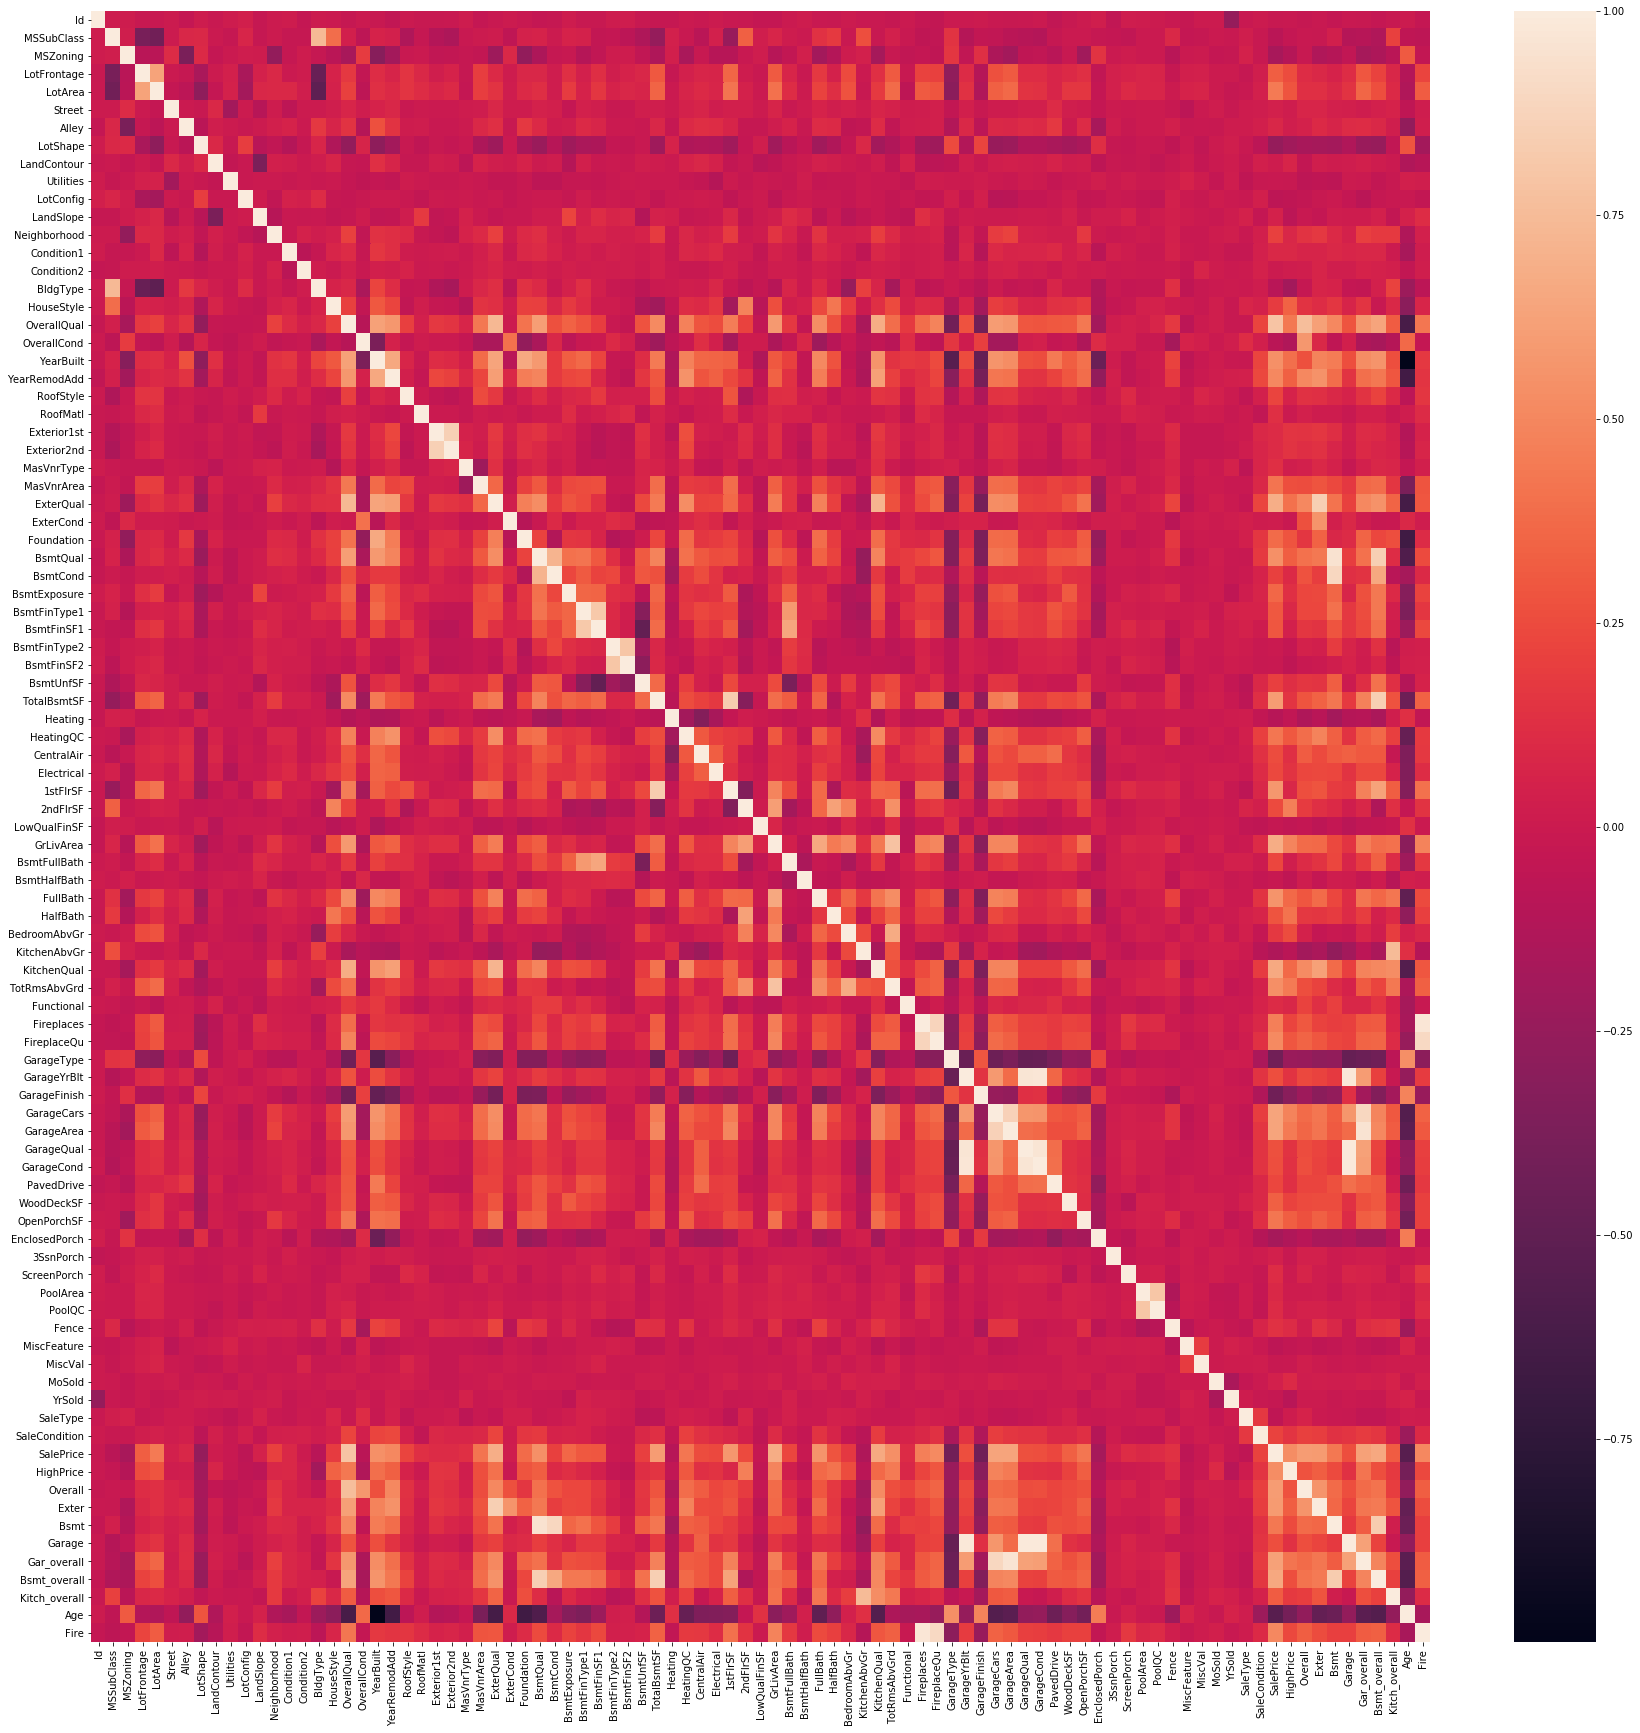

In [294]:
plt.figure(figsize=(30,30))
sns.heatmap(df3.corr())

In [295]:
col=df3.corr().SalePrice.sort_values(ascending=False).head(60)
col.drop('SalePrice',inplace=True)
col=col.index

In [296]:
df3.drop(['Exterior1st','BldgType','Overall','GarageArea','GarageCond','GarageQual','GarageYrBlt','Garage','Bsmt'],axis=1,inplace=True)

In [297]:
df3.drop(['BsmtFinSF1','BsmtFinSF2','1stFlrSF','PoolArea','LotFrontage'],axis=1,inplace=True)

## Scaling

In [298]:
from sklearn.preprocessing import RobustScaler
df3_col=df3.columns
df3=pd.DataFrame(RobustScaler().fit_transform(df3))
df3.columns=df3_col

## Training 1

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
train=df3[df3['SalePrice'].notna()]
test=df3[df3['SalePrice'].isna()]
train_x,valid_x,train_y,valid_y=train_test_split(train.drop('SalePrice',axis=1),df1.SalePrice)
print(np.mean(df1.SalePrice))

180921.19589041095


### 1.Linear Regression

In [300]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
print(np.mean(cross_val_score(LR,train_x,train_y,scoring='neg_mean_absolute_error')))

-21798.998155106077


### 2.Random Forest Regressor

In [301]:
from sklearn.ensemble import RandomForestRegressor 
RFR = RandomForestRegressor(n_estimators = 100, random_state = 0) 
print(np.mean(cross_val_score(RFR,train_x,train_y,scoring='neg_mean_absolute_error')))

-18078.704237442922


### 3.XGBoost

In [302]:
from xgboost import XGBRegressor
XGBR = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=5)
print(np.mean(cross_val_score(XGBR,train_x,train_y,scoring='neg_mean_absolute_error')))

-16414.369295804794


### 4.SVM

In [303]:
from sklearn.svm import SVR
SVMR= SVR(kernel = 'rbf')
print(np.mean(cross_val_score(SVMR,train_x,train_y,scoring='neg_mean_absolute_error')))

-55367.12454790152


### 5.KNN

In [304]:
from sklearn import neighbors
for K in range(20):
    K = K+1
    KNN = neighbors.KNeighborsRegressor(n_neighbors = K)
    KNN.fit(train_x, train_y)
    pred=KNN.predict(valid_x)
    error = (mean_squared_error(valid_y,pred))
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3117484301.4602737
RMSE value for k=  2 is: 2486822685.6
RMSE value for k=  3 is: 2305635225.590867
RMSE value for k=  4 is: 2384849637.5998287
RMSE value for k=  5 is: 2303732005.952877
RMSE value for k=  6 is: 2323165343.2025113
RMSE value for k=  7 is: 2293382036.3956385
RMSE value for k=  8 is: 2237522612.6962757
RMSE value for k=  9 is: 2212098574.9675293
RMSE value for k=  10 is: 2165081167.0951233
RMSE value for k=  11 is: 2167518034.4129734
RMSE value for k=  12 is: 2175086689.6753807
RMSE value for k=  13 is: 2178284631.4076033
RMSE value for k=  14 is: 2166724005.368367
RMSE value for k=  15 is: 2142493215.7359998
RMSE value for k=  16 is: 2111342445.3055758
RMSE value for k=  17 is: 2079956633.0741525
RMSE value for k=  18 is: 2067967942.671901
RMSE value for k=  19 is: 2076130112.4131825
RMSE value for k=  20 is: 2082356285.8446095


Error comes out to be less for K=13

In [305]:
KNN = neighbors.KNeighborsRegressor(n_neighbors = 13)
print(np.mean(cross_val_score(KNN,train_x,train_y,scoring='neg_mean_absolute_error')))

-27638.041376887948


### 6.Polynomial Regression

In [306]:
from sklearn.preprocessing import PolynomialFeatures 
for x in range(3):  
    x=x+1
    poly= PolynomialFeatures(degree = x) 
    X_poly = poly.fit_transform(train_x) 
    PLR=LinearRegression()
    PLR.fit(X_poly, train_y) 
    X_poly = poly.transform(valid_x)
    pred=PLR.predict(X_poly) 
    print('RMSE value for x= ' , x , 'is:', (mean_squared_error(valid_y,pred)))


RMSE value for x=  1 is: 1127301678.0334203
RMSE value for x=  2 is: 6670281995.427317
RMSE value for x=  3 is: 87346251477.43085


### 7.Lasso

In [307]:
from sklearn.linear_model import Lasso
LSR= Lasso(alpha=1.0,normalize=True, max_iter=1e5)
print(np.mean(cross_val_score(LSR,train_x,train_y,scoring='neg_mean_absolute_error')))

-21690.133733595252


Eventhough XGBoost gives different results, it is consantly throwing less error than other algorithms.Sowe will go with it.

In [308]:
XGBR.fit(train.drop('SalePrice',axis=1),df1.SalePrice)
pred1=XGBR.predict(test.drop('SalePrice',axis=1))

In [310]:
output=pd.DataFrame(pred1)
pred=pd.DataFrame(df2.Id)
pred.insert(1,'SalePrice',output,True)
pred.to_csv('Predictions2.csv',index=False)